# Ben Alton
# COMP 3800 - Data Analytics
# Project 2: Predicting Life Expectancy
##### Dataset Insights:
url - https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
- This dataset utilizes public domain information from the WHO data repository and economic data from the United Nations data repository. The dataset includes data from 193 different countries from the year 2000-2015.
- The target variable is 'Life expectancy'. My goal is to predict life expectancy given a set of correlated factors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

lifeex_df = pd.read_csv("life-expectancy.csv")
lifeex_df = lifeex_df[lifeex_df['Year'] == 2013]
lifeex_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
34,Algeria,2013,Developing,75.3,112.0,21,0.53,544.450743,95.0,25,...,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
50,Angola,2013,Developing,51.1,355.0,69,8.10,35.958573,77.0,8523,...,67.0,4.26,77.0,2.3,484.616884,2599834.0,8.6,8.5,0.523,11.4
66,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.58,1991.430372,99.0,0,...,98.0,5.33,99.0,0.2,12224.864160,NaN,3.3,3.3,0.781,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,Venezuela (Bolivarian Republic of),2013,Developing,73.8,159.0,9,6.71,0.000000,82.0,0,...,82.0,4.94,82.0,0.1,NaN,NaN,1.6,1.5,0.770,14.2
2876,Viet Nam,2013,Developing,75.7,129.0,28,4.00,0.000000,59.0,1123,...,93.0,7.17,59.0,0.1,NaN,NaN,14.3,14.9,0.668,12.3
2892,Yemen,2013,Developing,65.4,226.0,36,0.04,0.000000,73.0,400,...,67.0,5.78,73.0,0.1,NaN,NaN,13.7,13.5,0.498,9.0
2908,Zambia,2013,Developing,63.0,328.0,29,2.41,20.623063,79.0,35,...,74.0,4.99,79.0,4.8,185.793359,1515321.0,6.4,6.2,0.565,12.5


##### Data Cleaning:
- Since the dataset has been constrained to include only records from 2013, the 'Year' column is irrelevant. The 'Country' column is also irrelevant. All others are kept due to potential use in the analysis later.
- We will also transform the categorical variable 'Status' into a numerical variable, with 1 meaning the country is developed and 0 meaning the country is still in development.

In [2]:
lifeex_df.drop(columns = ['Year', 'Country'], inplace = True)
lifeex_df.dropna(inplace = True)

In [3]:
lifeex_df_backup = lifeex_df.copy()
lifeex_df.loc[lifeex_df["Status"] == "Developed", "Status"] = 1
lifeex_df.loc[lifeex_df["Status"] == "Developing", "Status"] = 0
lifeex_df

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
18,0,77.2,84.0,0,4.76,430.876979,99.0,0,56.5,1,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
34,0,75.3,112.0,21,0.53,544.450743,95.0,25,57.2,24,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
50,0,51.1,355.0,69,8.10,35.958573,77.0,8523,22.1,105,67.0,4.26,77.0,2.3,484.616884,2599834.0,8.6,8.5,0.523,11.4
82,0,76.0,119.0,8,8.28,1001.796332,94.0,0,61.6,10,99.0,4.99,94.0,0.1,12976.636420,42539925.0,1.0,0.9,0.823,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812,0,76.8,117.0,0,5.82,482.803945,94.0,0,62.9,0,94.0,8.68,94.0,0.1,16881.256800,3485.0,1.5,1.4,0.788,15.5
2828,0,69.1,185.0,17,0.01,19.162470,99.0,0,43.0,19,99.0,6.32,99.0,0.1,197.551233,32432.0,3.0,3.1,0.681,12.0
2844,0,71.6,135.0,0,0.01,447.545645,64.0,0,51.7,0,65.0,3.92,64.0,0.1,3167.343560,253142.0,1.5,1.4,0.591,10.8
2908,0,63.0,328.0,29,2.41,20.623063,79.0,35,22.3,42,74.0,4.99,79.0,4.8,185.793359,1515321.0,6.4,6.2,0.565,12.5


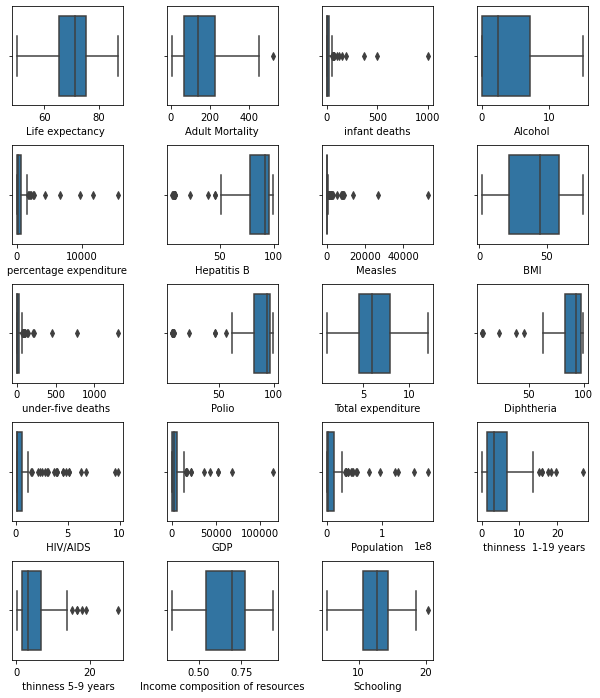

In [5]:
num = len(lifeex_df.columns)
fig=plt.figure(figsize=(10, 8))
for i in range(1,num):
    column = lifeex_df.iloc[:,i]
    sub = fig.add_subplot(6,4, i)
    sns.boxplot(x = column, data = lifeex_df)
    
plt.subplots_adjust(left=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

##### Feature Engineering
- We now begin to determine which features are truly relevant to our analysis, using mathematic methods rather than intuition.

In [6]:
# ANOVA testing numerical values:

cols = lifeex_df.drop(columns = 'Life expectancy ').columns
x = lifeex_df.loc[:, cols]
y = lifeex_df.loc[:, 'Life expectancy ']

fs = SelectKBest(score_func=f_classif, k='all')
best_feat = fs.fit(x, y)
np.set_printoptions(suppress = True)

results_df = pd.DataFrame(data = [cols, best_feat.scores_, best_feat.pvalues_])
print('results:\n')
results_df

results:



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,1.249417,6.18109,4.642233,1.35922,1.169344,1.415605,2.479869,1.331941,5.693546,1.187342,2.297166,2.392369,13.070324,2.728143,0.573937,1.255129,1.138494,6.60596,2.515245
2,0.246906,0.0,0.000005,0.169782,0.319805,0.139162,0.002902,0.186662,0.0,0.302124,0.005518,0.003939,0.0,0.001246,0.978058,0.242266,0.351871,0.0,0.002567


- Features with a large f-score have a high variance and thus are better for building our prediction model. Likewise, features with a p-value of <= .05 are statistically significant. Thus, features with a large f-score and p-value <= .05 are good predictor featues.
- From the table of results shown above, adult mortality, infant deaths, measles, under-five deaths, total healthcare expenditure, diphtheria, HIV/AIDS, GDP, income composition of resources, and schooling are good predition features.
- We will drop all other columns.

In [7]:
lifeex_df.drop(columns = ['Status', 'Alcohol', 'percentage expenditure', 'Hepatitis B', ' BMI ', 'Polio', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years'], inplace = True)
lifeex_df.drop(columns = ['Life expectancy ']).corr()

,Adult Mortality,infant deaths,Measles,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,GDP,Income composition of resources,Schooling
Adult Mortality,1.000000,0.151545,0.163021,0.171959,-0.148230,-0.304787,0.703630,-0.245538,-0.567227,-0.483831
infant deaths,0.151545,1.000000,0.628294,0.996449,-0.177946,-0.174221,0.061316,-0.093780,-0.196983,-0.217195
Measles,0.163021,0.628294,1.000000,0.666468,-0.141502,-0.168951,0.105994,-0.052244,-0.098930,-0.117825
under-five deaths,0.171959,0.996449,0.666468,1.000000,-0.179924,-0.195962,0.081534,-0.095935,-0.214524,-0.231199
Total expenditure,-0.148230,-0.177946,-0.141502,-0.179924,1.000000,0.191749,0.039487,0.187841,0.228649,0.274475
Diphtheria,-0.304787,-0.174221,-0.168951,-0.195962,0.191749,1.000000,-0.198330,0.155889,0.435938,0.473152
HIV/AIDS,0.703630,0.061316,0.105994,0.081534,0.039487,-0.198330,1.000000,-0.151385,-0.480890,-0.363655
GDP,-0.245538,-0.093780,-0.052244,-0.095935,0.187841,0.155889,-0.151385,1.000000,0.464283,0.428716
Income composition of resources,-0.567227,-0.196983,-0.098930,-0.214524,0.228649,0.435938,-0.480890,0.464283,1.000000,0.915999
Schooling,-0.483831,-0.217195,-0.117825,-0.231199,0.274475,0.473152,-0.363655,0.428716,0.915999,1.000000


- Performing a regression analysis on features that are highly (|r| >= .9) could produce some misleading results. We will remove any feature that has a r-value of >= .9.
- Under-five deaths and infant deaths have a high correlation coefficent (for obvious reasons), as do schooling and income composition of resources.
- We will drop under-five deaths and income compostion.

In [8]:
lifeex_df.drop(columns = ['under-five deaths ', 'Income composition of resources'], inplace = True)

##### Building Prediction Model
- Our dataset now contains only features that are statistically significant compared to life expectancy and do not have a high correlation to each other.
- Our dataset is also balanced.
- Since we are using logistic regression to predict life expectancy, standardization/normalization is not necessary.
- Before we can do the prediction, life expectancy must be modified to represent classification. For the purposes of this project, we will set the life expectancy threshold to >= 70 years old.

In [9]:
lifeex_df = lifeex_df.astype({'Life expectancy ': 'int64'})
lifeex_df.loc[lifeex_df['Life expectancy '] < 70, 'Life expectancy '] = 0
lifeex_df.loc[lifeex_df['Life expectancy '] >= 70, 'Life expectancy '] = 1
lifeex_df['Life expectancy '].value_counts()

1    71
0    59
Name: Life expectancy , dtype: int64

In [10]:
x = lifeex_df.drop(['Life expectancy '], axis = 1)
y = lifeex_df['Life expectancy ']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [11]:
log_reg = LogisticRegression(penalty='none', max_iter=2000)
log_reg.fit(x, y)

LogisticRegression(max_iter=2000, penalty='none')

In [12]:
y_pred = log_reg.predict(x_test)
print("Prediction model accuracy:", accuracy_score(y_test, y_pred))

Prediction model accuracy: 0.9230769230769231


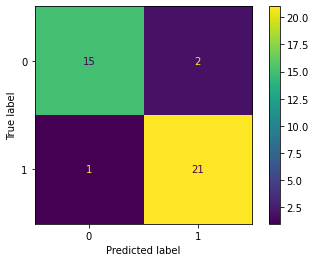

In [13]:
ConfusionMatrixDisplay.from_estimator(log_reg, x_test, y_test)